In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
from tqdm import tqdm


path = '../data/movie_lens_small/ratings.csv'

movies = pd.read_csv(path)


user_item_matrix = pd.pivot_table(movies,
                                index='userId',
                                columns='movieId',
                                values='rating')

user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#44444

In [3]:

path = '../data/movie_lens_small/movies.csv'

names = pd.read_csv(path)


names

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
movie_names_map = dict(zip(names.movieId, names.title))

# movie_names_map

In [5]:
#44444

## Histograma en escala logaritmica 

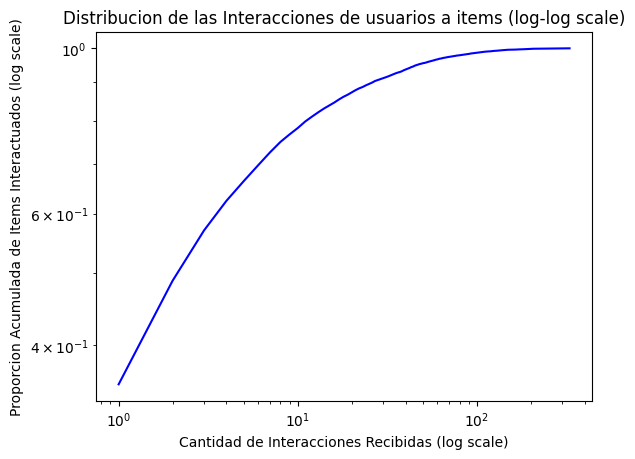

In [6]:

count_counts = movies['movieId'].value_counts().value_counts()

# Calculate cumulative frequency
cumulative_frequency = count_counts.sort_index().cumsum()/9724

# Plotting in log-log scale using a line plot
plt.plot(cumulative_frequency.index, cumulative_frequency.values, linestyle='-', color = "b")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cantidad de Interacciones Recibidas (log scale)')
plt.ylabel('Proporcion Acumulada de Items Interactuados (log scale)')
plt.title('Distribucion de las Interacciones de usuarios a items (log-log scale)')
plt.show()


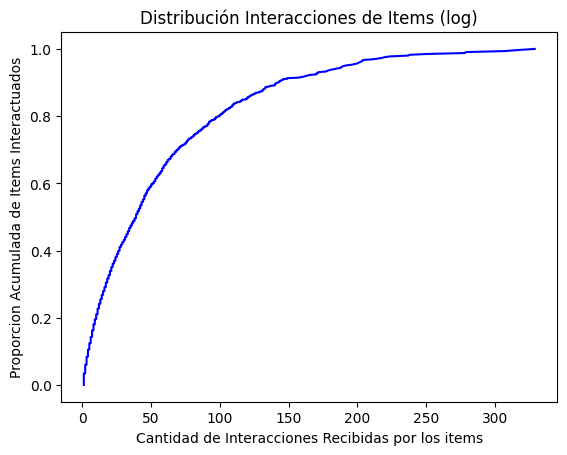

In [7]:
movie_counts = movies['movieId'].value_counts(ascending=True).values


cumulative_frequency = movie_counts.cumsum()/movie_counts.cumsum()[-1]

# Plotting in log-log scale using a line plot
plt.plot(movie_counts, cumulative_frequency, linestyle='-', color = "b")
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Cantidad de Interacciones Recibidas por los items')
plt.ylabel('Proporcion Acumulada de Items Interactuados')
plt.title('Distribución Interacciones de Items (log)')
plt.show()

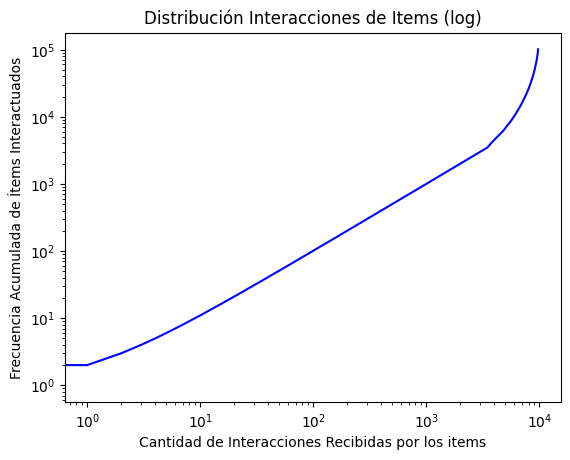

In [8]:
movie_counts = movies['movieId'].value_counts(ascending=True).values


cumulative_frequency = movie_counts.cumsum()


plt.plot(cumulative_frequency, linestyle='-', color = "b")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cantidad de Interacciones Recibidas por los items')
plt.ylabel('Frecuencia Acumulada de Ítems Interactuados')
plt.title('Distribución Interacciones de Items (log)')
plt.show()

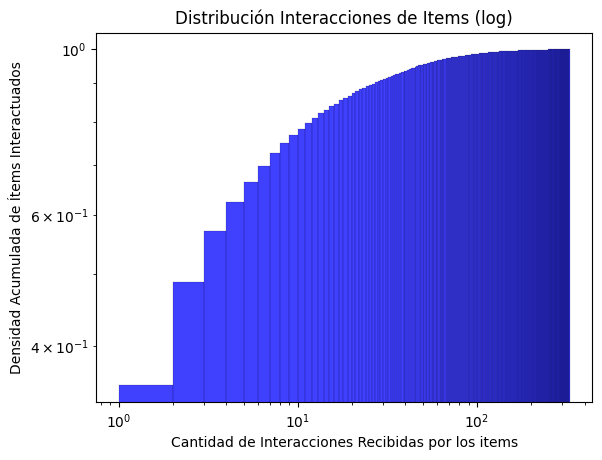

In [9]:

item_counts = movies['movieId'].value_counts()


sns.histplot(item_counts, bins=range(1, item_counts.max() + 2), color='blue', cumulative=True, stat='density')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cantidad de Interacciones Recibidas por los items')
plt.ylabel('Densidad Acumulada de Ítems Interactuados')
plt.title('Distribución Interacciones de Items (log)')
plt.show()


# cuantos valores son mas grandes estrictos a partir del que estoy parado, normalizar

Aqui podemos observar que a medida que va creciendo el numero de interacciones recibidas por items, el salto del grafico acumulado (paso en "y"), se hace mas pequeño. Esto se interpreta como que la gran mayoria de las peliculas, tienen muy pocas interacciones. 

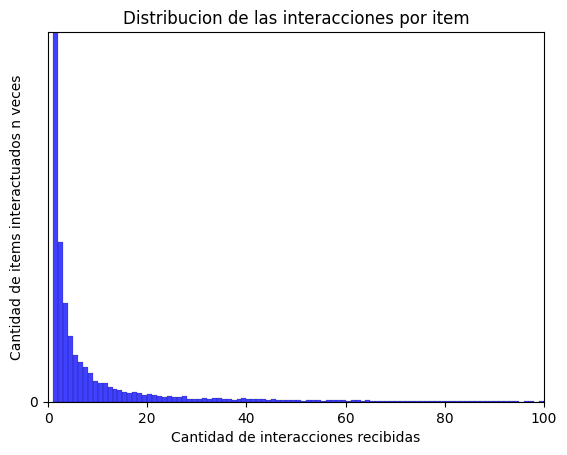

In [10]:

item_counts = movies['movieId'].value_counts()

# Create a histogram
sns.histplot(item_counts, bins=range(1, item_counts.max() + 2), color='blue')
plt.xlabel('Cantidad de interacciones recibidas')
plt.ylabel('Cantidad de items interactuados n veces')
plt.title('Distribucion de las interacciones por item')
plt.yticks(range(0, item_counts.max() + 1, 5000))
plt.xlim(0, 100)
plt.ylim(0, 3000)
plt.show()

# ME ASEGURO UN MINIMO DE SOLAPAMIENTO EN INTERACCIONES DE USUARIOS E ITEMS Y CON ESTO GENERO RECOMENDACIONES

In [11]:
min_interactions_user = 90#25
min_interactions_items = 105#35

item_overlap_idx = user_item_matrix.apply(lambda x: np.sum(x.notna()), axis = 0) >= min_interactions_items
user_overlap_idx = user_item_matrix.apply(lambda x: np.sum(x.notna()), axis = 1) >= min_interactions_user


user_item_matrix_overlap = user_item_matrix.loc[user_overlap_idx, item_overlap_idx]
user_item_matrix_overlap.shape

(265, 120)

## Del total de datos, me termino quedando con un 89% de los usuarios y un 7.7% de los items

In [12]:
user_item_matrix_overlap.shape[0] / user_item_matrix.shape[0]*100, round(user_item_matrix_overlap.shape[1] / user_item_matrix.shape[1]*100, 2)

(43.44262295081967, 1.23)

# TIEMPO DE COMPUTO CON UN SAMPLEO PEQUEÑO

# PREDICCION

In [26]:
from utils.data_splitting_utils import train_test_split

train_df, y_true, test_items = train_test_split(user_item_matrix_overlap)
train_df.shape

(265, 120)

In [27]:
from utils.collaborative_filtering import compute_item_similarity



sim_train = compute_item_similarity(train_df)

Computing Similarities: 100%|██████████| 120/120 [00:26<00:00,  4.46item/s]


In [28]:
from utils.collaborative_filtering import compute_prediction

y_pred = {}


for u, items in test_items.items():
    aux = []
    for i in items:
        aux.append(compute_prediction(u, train_df, i, sim_train))
        y_pred[u] = aux

In [29]:
from utils.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error


mae  = {}
mse  = {}
rmse = {}

for u in list(train_df.index.values):
    mae[u]  = mean_absolute_error(y_true[u] , y_pred[u])
    mse[u]  = mean_squared_error(y_true[u] , y_pred[u])
    rmse[u] = root_mean_squared_error(y_true[u] , y_pred[u])

avg_mae  = np.mean(list(mae.values()))
avg_mse  = np.mean(list(mse.values()))
avg_rmse = np.mean(list(rmse.values()))



In [30]:
avg_mae, avg_mse, avg_rmse

(0.6173740522558785, 0.6603440602325569, 0.7434615717793918)

In [ ]:
o sea, yo ahora selecciono estos 10 idx de cada usuario (fila) y les imputo un np.nan
Luego, cuando paso por todos los usuarios, genero la nueva matriz user_rating_train
y luego, predigo estos idx que previamente impute como np.nan
luego aplico las metricas comparando y_test vs y_pred en los test_idx

In [ ]:
#444

Para obtener el valor frontera de HIT, debo normalizar y debo tomar el percentil tmb o esta de mas?

OBJETIVOS:

TEORIA METRICAS:
    MAE (QUE ES?, PROS, CONTRAS)
    NMAE (QUE ES?, PROS, CONTRAS)
    RMSE (QUE ES?, QUE PENALIZA)

    PRECISION (QUE ES?, QUE MIDE? COMO NORMALIZO LOS HITS, Y PORQUE NORMALIZO?) VALOR DE RATING IGUAL O MAYOR AL 3ER CUARTIL O EL PERCENTIL 80
    RECALL (QUE ES?, QUE MIDE?)
    F1 SCORE (QUE ES?, QUE MIDE?)
    COVERAGE (QUE ES?, QUE MIDE?)


    CON CUAL ENTRENO (F1 SCORE)?, POR QUE?

    METRICAS DE RANKING:
    NDCG?, O VER EN EL LIBRO, SIMPLEMENTE IMPLEMENTARLA.



# METRICAS

### MAE?

### RMSE?

### COVERAGE
Mide que proporcion de los items existentes en el catalogo, son devueltos en las recomendaciones 

# How to split the data between train and test

In order to evaluate algorithms offline, it is necessary to simulate the online process where the system makes predictions or recommendations, and the user corrects the predictions or uses the recommendations. This is usually done by recording histor- ical user data, and then hiding some of these interactions in order to simulate the knowledge of how a user will rate an item, or which recommendations a user will act upon. There are a number of ways to choose the ratings/selected items to be hid- den. Once again, it is preferable that this choice be done in a manner that simulates the target application as closely as possible. In many cases, though, we are restricted by the computational cost of an evaluation protocol, and must make compromises in order to execute the experiment over large data sets.<p>
Ideally, if we have access to time-stamps for user selections, we can simulate what the systems predictions would have been, had it been running at the time the data set was collected. We can begin with no available prior data for computing predictions, and step through user selections in temporal order, attempting to predict each selection and then making that selection available for use in future predictions. For large data sets, a simpler approach is to randomly sample test users, randomly sample a time just prior to a user action, hide all selections (of all users) after that instant, and then attempt to recommend items to that user. This protocol requires changing the set of given information prior to each recommendation, which can still be computationally quite expensive.<p>
An even cheaper alternative is to sample a set of test users, then sample a single test time, and hide all items after the sampled test time for each test user. This simulates a situation where the recommender system is built as of the test time, and then makes recommendations without taking into account any new data that arrives after the test time. Another alternative is to sample a test time for each test user, and hide the test user’s items after that time, without maintaining time consistency across users. This effectively assumes that the sequence in which items are selected is important, not the absolute times when the selections are made. A final alternative is to ignore time. We would first sample a set of test users, then sample the number na of items to hide for each user a, and finally sample na items to hide. This assumes that the temporal aspects of user selections are unimportant. We may be forced to make this assumption if the timestamps of user actions are not known. All three of the latter alternatives partition the data into a single training set and single test set. It is important to select an alternative that is most appropriate for the domain and task of interest (see Chapter 11), given the constraints, rather than the most convenient one.<p>

A common protocol used in many research papers is to use a fixed number of known items or a fixed number of hidden items per test user (so called “given n” or “all but n” protocols). This protocol is useful for diagnosing algorithms and identi- fying in which cases they work best. However, when we wish to make decisions on the algorithm that we will use in our application, we must ask ourselves whether we are truly interested in presenting recommendations only for users who have rated exactly n items, or are expected to rate exactly n items more. If that is not the case, then results computed using these protocols have biases that make them unreliable in predicting the performance of the algorithms online.



## METHOD

When evaluating
a recommendation method, a group of user profiles is normally used as input
to train the algorithm and build a model that allows the system to compute
recommendations efficiently at run time. A second group of user profiles,
different from the first, is required for measuring or testing the algorithm’s
performance. To ensure that the measurements are reliable and not biased by
some user profiles, the random split, model building, and evaluation steps are
repeated several times to determine average results. N-fold cross-validation is a
stratified random selection technique in which one of N disjunct fractions of the
userprofilesofsizeN1 isrepeatedlyselectedandusedforevaluation,leavingthe
remaining N −1 user profiles to be exploited for building the algorithm’s model. N
Consequently, each user profile is used exactly once to evaluate the algorithm and N − 1 times to contribute to the algorithm’s model building step.<P>

In addition, during the testing step, the user profile must be split into two groups, namely, user ratings to train and/or input the algorithm (i.e., determining similar peers in case of collaborative filtering) and to evaluate the predictions.<P>

### The all but N method<P>
One of two popular variants may be applied to split the rating base of the currently evaluated user into training and testing partitions. The all but N method assigns a fixed number N to the testing set of each evaluated user, whereas the given N method sets the size of the training partition to N elements. Both methods have their strengths, especially when one varies N to evaluate the sensitivity of an algorithm with respect to different testing or training set sizes. A fixed training set size has the advantage that the algorithm has the same amount of information from each tested user, which is advantageous when measuring the predictive accuracy. In contrast, fixed testing set sizes establish equal conditions for each user when applying classification metrics.<p>

To evaluate the accuracy of an algorithm’s classifications, Likert scale ratings need to be transformed into relevant and not-relevant items – for instance, classifying only items rated 4 and above as relevant. This leads us back to the discussion in Sec- tion 7.2.2 on how to treat items with unknown rating values. The current state of practice assumes that these items are nonrelevant, and therefore evaluation measures reward algorithms only for recommending relevant items from the testing set, as is explained in the next subsection.

# EN ALGUN MOMENTO DE LA TESIS, DEBE HABER LA DISCUSION DE COMO ENCARAR EL ASUNTO DE RECOMENDAR COSAS Q NO SEAN SIEMPRE DEL ESTILO DEL USUARIO, ALCANZAR LA DIVERSIDAD DE RECOMENDACION, CON ESTRATEGIAS COMO AGREGAR ALGUN ITEM DEL FINAL DE LA LISTA EN EL TOP N, PERO EXPLICAR SOBRE ESTE PROBLEMA Y COMO ABORDARLO

ratings greater or equal than 4 are consider a "HIT", and we will count the HITS of each user.


we must assume that users’ behavior when interacting with a system including the recommender system chosen will be modeled well by the users’ behavior prior to that system’s deployment

Primero nos generamos a TOP-N recomendaciones para un usuario. y si alguna de las recomendaciones son peliculas YA VISTAS por el usuario, se considera un HIT. debido a que el sistema recomendo algo al usuario que este ya encontro interante por su propia cuenta, por lo tanto, lo contamos como algo deseado.
Luego sumamos todos los HITS en el top-N recomendacions para cada usuario y lo dividimos por la cantidad de usuarios.

In [ ]:
#4444


Tengo una idea de las metricas q podria utilizar, creo q la mas facil de aplicar seria Accuracy F1 score junto con Coverage O 
ESE COVERAGE MEJORADO, pero deberia contestar:
    - DEFINO PRECISION, RECALL, COMO LOS CALCULO, CON Q FORMULA
    - Porque elijo Accuracy F1 score por sobre las demas como MAE, RMSE, MSE?
    - QUE ES Y PARA QUE ME SIRVE COVERAGE?
    - CITAR PAPER?, VER SI EL PAPER HABLA SOBRE COVERAGE O F1 SCORE.
    